<a href="https://colab.research.google.com/github/SalhaAlzahrani/MS_Trust/blob/main/EDA_MS_MY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
*   Dataset 1: Multiple Sclerosis (MS)
*   Dataset 2: Myelitis (MY)




In [ ]:
!pip install -U -q tensorflow-addons
!pip install scikit-plot

In [ ]:
import random
import os
import glob
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_addons as tfa

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, top_k_accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc

from google.colab import drive
# Define the path to the MRI data directory
drive.mount('/content/drive', force_remount=True)

np.random.seed(42)
tf.random.set_seed(42)
AUTO = tf.data.AUTOTUNE



---


## Dataset 1: Multiple Sclerosis (MS)

In [ ]:
NUM_CLASSES = 4
IMG_SIZE =224
BATCH_SIZE = 32
input_shape = (224, 224, 3)

In [ ]:
# train data
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Both',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# validation data
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Both',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3427 files belonging to 4 classes.
Using 3085 files for training.
Found 3427 files belonging to 4 classes.
Using 342 files for validation.


In [ ]:
train_ds.class_names

['Control_Axial', 'Control_Sagittal', 'MS_Axial', 'MS_Sagittal']

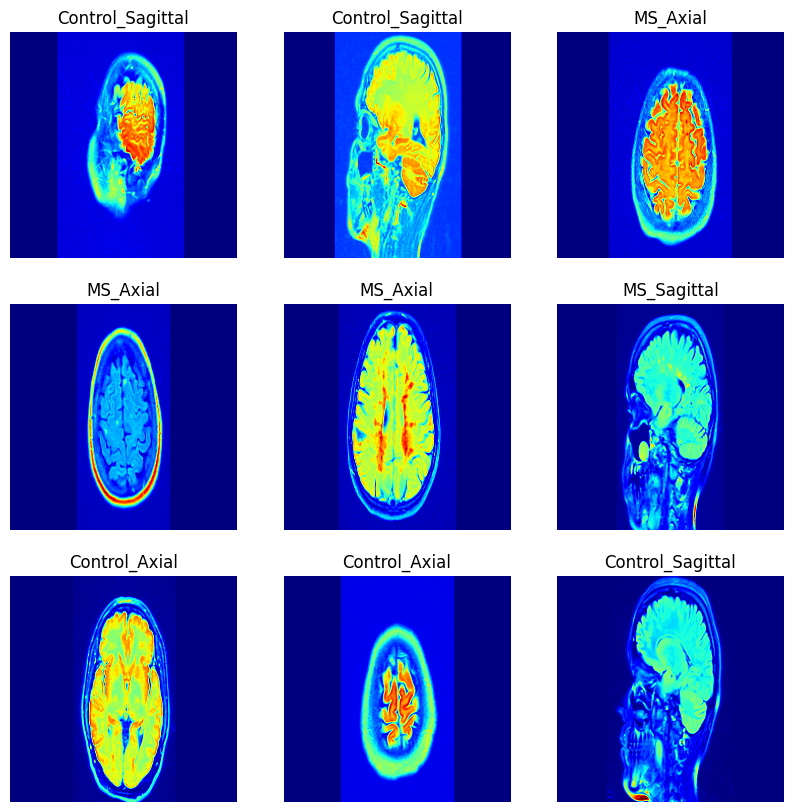

In [ ]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
crop = keras.Sequential(
    [
        tf.keras.layers.CenterCrop(height=224, width=224)
    ],
    name="crop",
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = crop(images[i] )
        plt.imshow(tf.image.rgb_to_grayscale(augmented_image), cmap='jet')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
# Generate Figure
fig = plt.figure(figsize=(14, 10))
train_label = np.concatenate([y for x, y in train_ds], axis=0)
val_label = np.concatenate([y for x, y in validation_ds], axis=0)

<Figure size 1400x1000 with 0 Axes>

In [ ]:
# Plot Labels Distribution
plt.title('Dataset Labels Distribution', fontsize=10)
plt.hist(train_label, bins='auto', histtype='bar', orientation='horizontal')
plt.legend(prop={'size': 10})


In [ ]:
# train data
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Axial',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# validation data
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Axial',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1652 files belonging to 2 classes.
Using 1487 files for training.
Found 1652 files belonging to 2 classes.
Using 165 files for validation.


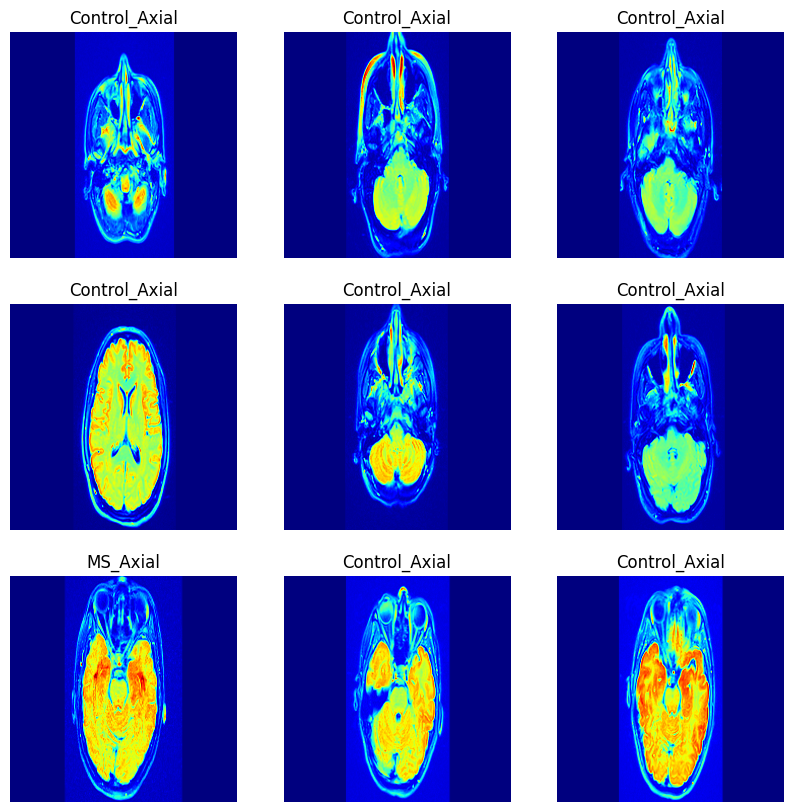

In [ ]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
crop = keras.Sequential(
    [
        tf.keras.layers.CenterCrop(height=224, width=224)
    ],
    name="crop",
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = crop(images[i] )
        plt.imshow(tf.image.rgb_to_grayscale(augmented_image), cmap='jet')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
# train data
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Sagittal',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# validation data
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Multiple_Sclerosis_Dataset/Sagittal',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1775 files belonging to 2 classes.
Using 1598 files for training.
Found 1775 files belonging to 2 classes.
Using 177 files for validation.


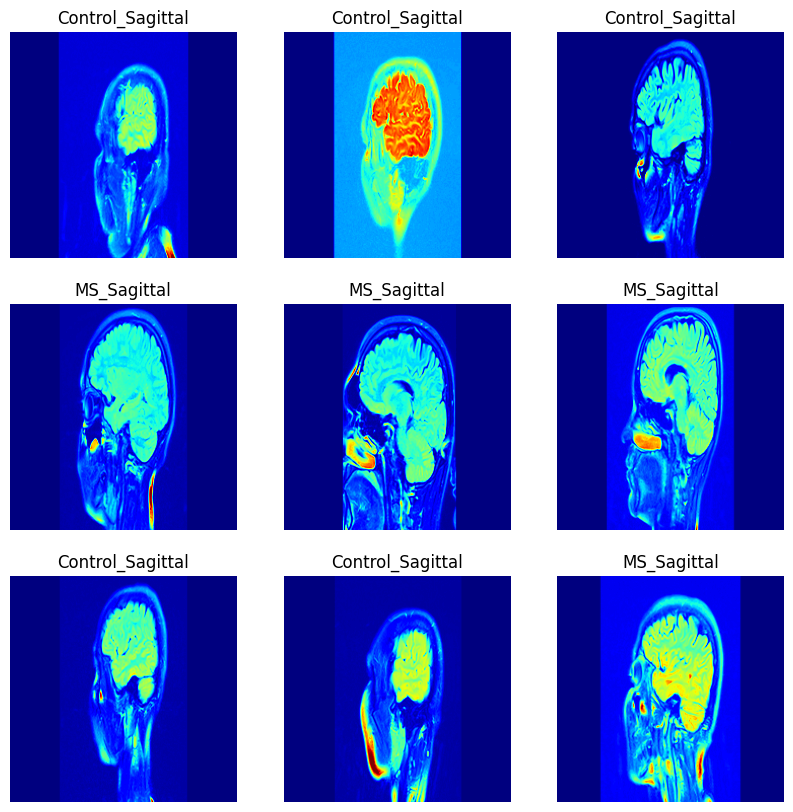

In [ ]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
crop = keras.Sequential(
    [
        tf.keras.layers.CenterCrop(height=224, width=224)
    ],
    name="crop",
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = crop(images[i] )
        plt.imshow(tf.image.rgb_to_grayscale(augmented_image), cmap='jet')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()



---


## Dataset 2: Myelitis (MY)

In [ ]:
NUM_CLASSES = 3
IMG_SIZE =224
BATCH_SIZE = 32
input_shape = (224, 224, 3)

# Load dataset

In [ ]:
# train data
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Myelitis_Dataset_Three_Classes',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# validation data
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Myelitis_Dataset_Three_Classes',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    #image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2771 files belonging to 3 classes.
Using 2494 files for training.
Found 2771 files belonging to 3 classes.
Using 277 files for validation.


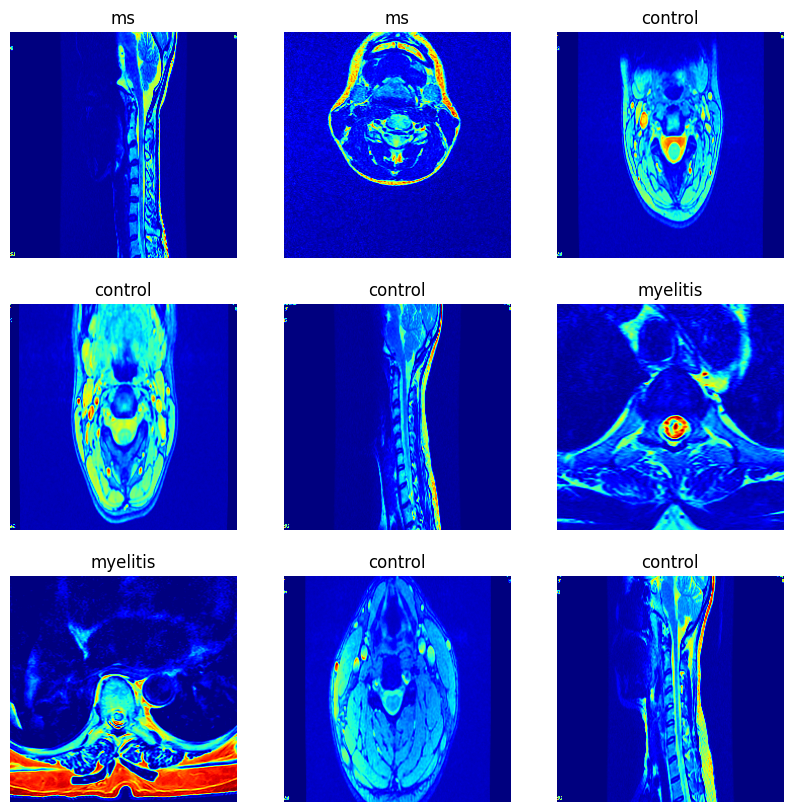

In [ ]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
crop = keras.Sequential(
    [
        tf.keras.layers.CenterCrop(height=224, width=224)
    ],
    name="crop",
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = crop(images[i] )
        plt.imshow(tf.image.rgb_to_grayscale(augmented_image), cmap='jet')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()

# Data augmentation

In the original paper, the authors use AutoAugment to induce stronger regularization. For this example, we will be using the standard geometric augmentations like random cropping and flipping.

https://arxiv.org/abs/1805.09501

In [ ]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.CenterCrop(height=IMG_SIZE, width=IMG_SIZE)
    ],
    name="data_augmentation",
)

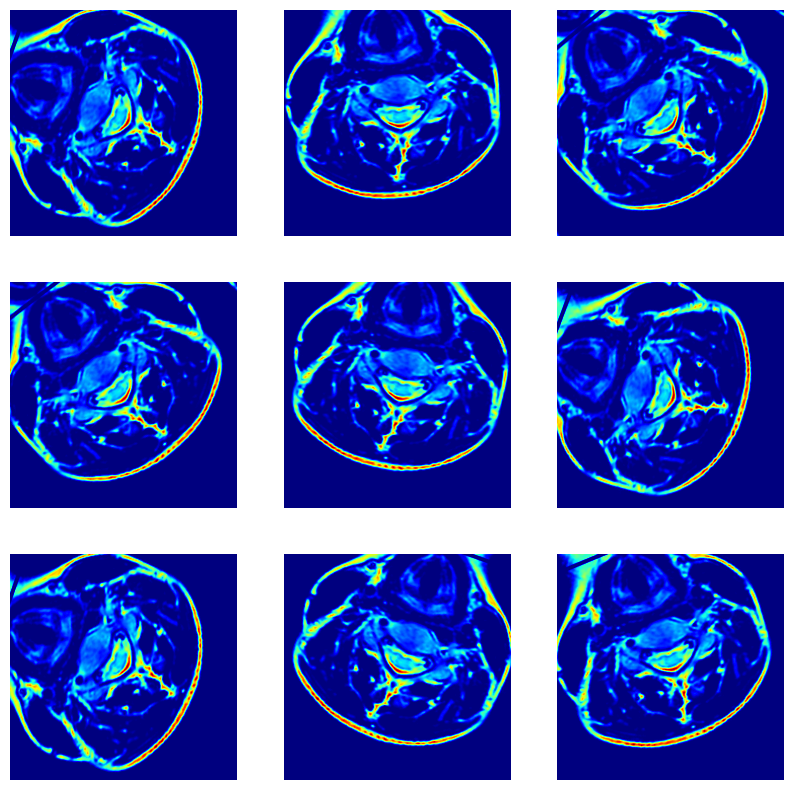

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(first_image)

    plt.imshow(tf.image.rgb_to_grayscale(augmented_image), cmap='jet')
    plt.axis('off')